<a href="https://colab.research.google.com/github/RohitSen1235/DataAnalysisAndML/blob/main/Trading_Journal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
file = f"/content/drive/MyDrive/Upwork/Isabella_trading_dash/2023 trade file.xlsx"

In [29]:
df = pd.read_excel(file)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7755 entries, 0 to 7754
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         7755 non-null   object 
 1   Description  7755 non-null   object 
 2   Ticker       7561 non-null   object 
 3   Debit        4207 non-null   float64
 4   Credit       3546 non-null   float64
 5   Balance      7754 non-null   float64
 6   Margin       7755 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 424.2+ KB


In [31]:
df['Description'].unique()

array(['Closing', 'Opening', 'Open', 'Add', 'Margin Call', 'Close',
       'Reduce'], dtype=object)

In [32]:
new_df=df[df['Ticker'] == 'LVS US Equity']
new_df['Date']=pd.to_datetime(new_df['Date'])

new_df

<ipython-input-32-7073a0190166>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date']=pd.to_datetime(new_df['Date'])


,Date,Description,Ticker,Debit,Credit,Balance,Margin
3,2022-12-30 15:42:00,Open,LVS US Equity,249976.0,NaN,98750040.0,1999968
17,2023-01-03 09:34:00,Open,LVS US Equity,999960.0,NaN,83843158.0,4955859
25,2023-01-03 09:48:00,Close,LVS US Equity,NaN,988120.0,85218056.0,4955859
126,2023-01-09 10:58:00,Close,LVS US Equity,NaN,273108.0,88036815.0,5996005
387,2023-01-23 09:30:00,Open,LVS US Equity,1999947.0,NaN,77814313.0,17974455
412,2023-01-23 10:23:00,Close,LVS US Equity,NaN,2024665.0,76834020.0,16887708
522,2023-01-25 15:28:00,Open,LVS US Equity,499950.0,NaN,98316034.0,999900
525,2023-01-26 09:32:00,Close,LVS US Equity,NaN,526038.0,98583867.0,455984
1093,2023-02-09 10:36:00,Open,LVS US Equity,1999978.0,NaN,96093047.0,15086842
1097,2023-02-09 10:48:00,Reduce,LVS US Equity,NaN,998535.0,99358086.0,8556763


In [51]:
class Trades():
    """
    Class to extract trades from a given excel file
    """
    def __init__(self, excel_file):
        self.original_data = pd.read_excel(excel_file)

        # Removing Margin Calls from the data
        condition_margin_call = data.original_data['Description'] == 'Margin Call'

        # Removing rows where Description is 'Margin Call'
        self.original_data = self.original_data[~condition_margin_call]

        # Displaying the resulting DataFrame
        self.original_data['Date'] = pd.to_datetime(self.original_data['Date']).dt.date
        self.all_tickers = self.original_data['Ticker'].dropna().unique().tolist()
        self.swing_df = pd.DataFrame()
        self.intraday_df = pd.DataFrame()

    def extract_trades(self):

        for ticker in self.all_tickers:
            temp_df=self.original_data[self.original_data['Ticker'] == ticker ]
            # Initialize variables to store trade information
            open_trades = []
            current_trade = None
            trades = []
            intraday_trades =[]

            # Iterate through the rows
            for index, row in temp_df.iterrows():
                if row['Description'] == 'Open':
                      # New trade started or adding to/reducing an existing trade
                      if current_trade is None:
                          current_trade = {
                              'OpenIndex': index,
                              'OpenDate': row['Date'],
                              'Ticker': row['Ticker'],
                              'OpenDebit': row['Debit'],
                              'CloseIndex': None,
                              'CloseDate': None,
                              'CloseCredit': 0.0,
                              'ProfitLoss': 0.0
                          }
                      else:
                          pass
                elif row['Description'] == "Add" and current_trade is not None:
                      current_trade['OpenDebit'] += row['Debit']

                elif row['Description'] == "Reduce" and current_trade is not None:
                      current_trade['CloseCredit'] += row['Credit']

                elif row['Description'] == 'Close' and current_trade is not None:
                    # Close the current trade
                  current_trade['CloseIndex'] = index
                  current_trade['CloseDate'] = row['Date']
                  current_trade['CloseCredit'] += row['Credit']
                  current_trade['ProfitLoss'] = current_trade['CloseCredit'] - current_trade['OpenDebit']

                  if row['Date'] == current_trade['OpenDate']:
                        # This is an intraday trade
                        intraday_trades.append(current_trade)
                        # current_trade = None  # Reset current trade
                  else:
                        trades.append(current_trade)
                  # Append the trade to the list of trades

                  current_trade = None  # Reset current trade

            # Create a new DataFrame from the list of trades
            swing_trades = pd.DataFrame(trades)
            intraday_trades = pd.DataFrame(intraday_trades)

            self.swing_df = pd.concat([self.swing_df, swing_trades], ignore_index=True)
            # return the trades df with all the trades related info
            self.intraday_df = pd.concat([self.intraday_df,intraday_trades], ignore_index = True)

    def portfolio_value(self):
        # Sorting the DataFrame by date for better visualization
        df = self.original_data.copy()
        # Filter rows where the description is "Close"
        closed_positions = df[df['Description'] == 'Close']

        # Plotting Time Series for Portfolio Value (Balance) at "Close" points
        plt.figure(figsize=(12, 6))
        plt.plot(closed_positions['Date'], closed_positions['Balance'], marker='o', linestyle='-', color='b')
        plt.title('Portfolio Value at "Close" Points Over Time')
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value')
        plt.grid(True)
        plt.show()


#Add open trades to a stack,
On Close check for the close date, if close date is same as the Stack top CLose date then it is an intra day trade#

In [45]:
data = Trades(file)
data.extract_trades()

<ipython-input-44-5514eb929717>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.original_data = self.original_data[~condition_margin_call]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [46]:
data.swing_df.head(10)

,OpenIndex,OpenDate,Ticker,OpenDebit,CloseIndex,CloseDate,CloseCredit,ProfitLoss
0,2,2022-12-30,JD US Equity,999984.0,16,2023-01-03,1051361.0,51377.0
1,2540,2023-03-23,JD US Equity,4036005.0,2616,2023-03-27,4022456.0,-13549.0
2,3071,2023-04-10,JD US Equity,3499991.0,3136,2023-04-11,1986124.0,-1513867.0
3,3366,2023-04-17,JD US Equity,6999950.0,3415,2023-04-18,7029560.0,29610.0
4,3703,2023-05-05,JD US Equity,5969819.0,3753,2023-05-09,5805739.0,-164080.0
5,3814,2023-05-11,JD US Equity,7065206.0,3854,2023-05-12,7054925.0,-10281.0
6,3903,2023-05-15,JD US Equity,5102568.0,3970,2023-05-17,5101932.0,-636.0
7,3989,2023-05-17,JD US Equity,2999974.0,3998,2023-05-18,2858869.0,-141105.0
8,6053,2023-08-24,JD US Equity,1999971.0,6080,2023-08-25,1929018.0,-70953.0
9,3,2022-12-30,LVS US Equity,249976.0,25,2023-01-03,988120.0,738144.0


In [50]:
data.swing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OpenIndex    1228 non-null   int64  
 1   OpenDate     1228 non-null   object 
 2   Ticker       1228 non-null   object 
 3   OpenDebit    1228 non-null   float64
 4   CloseIndex   1228 non-null   int64  
 5   CloseDate    1228 non-null   object 
 6   CloseCredit  1228 non-null   float64
 7   ProfitLoss   1228 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 76.9+ KB


In [47]:
print(data.swing_df['ProfitLoss'].sum())

-44979879.0


In [41]:
nan_count = data.intraday_df['OpenDebit'].isna().sum()
print(nan_count)

0


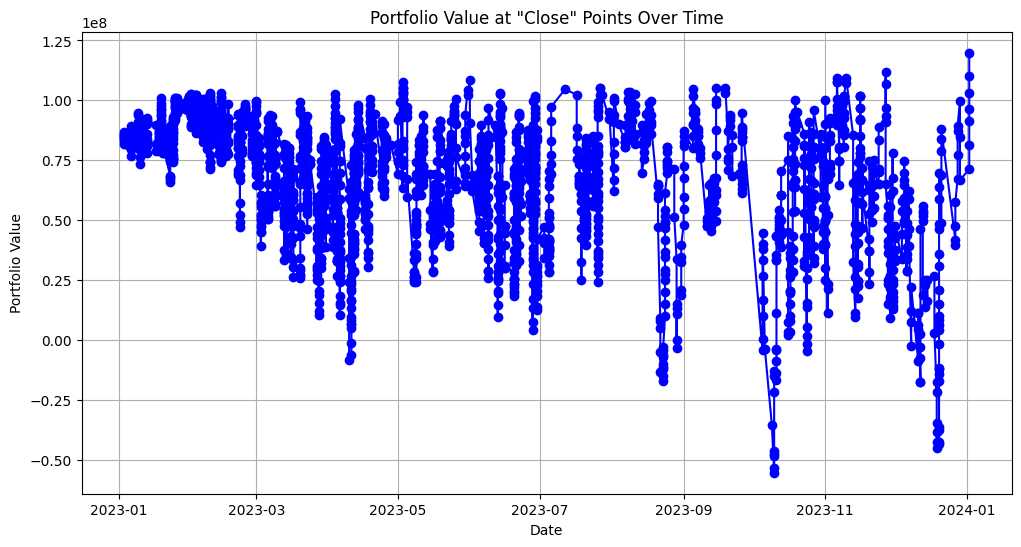

In [42]:
data.portfolio_value()

In [43]:
# 1. Number of rows where Description is 'Open' and Debit is empty or NaN
condition1 = (data.original_data['Description'] == 'Open') & (data.original_data['Debit'].isna() | (data.original_data['Debit'] == ''))

# 2. Number of rows where Description is 'Close' and Credit is empty or NaN
condition2 = (data.original_data['Description'] == 'Close') & (data.original_data['Credit'].isna() | (data.original_data['Credit'] == ''))

condition3 = (data.original_data['Description'] == 'Add') & (data.original_data['Debit'].isna() | (data.original_data['Debit'] == ''))

condition4 = (data.original_data['Description'] == 'Reduce') & (data.original_data['Credit'].isna() | (data.original_data['Credit'] == ''))

# Applying the conditions and counting the rows
count_open_missing_debit = data.original_data[condition1].shape[0]
count_close_missing_credit = data.original_data[condition2].shape[0]
count_close_missing_Add = data.original_data[condition3].shape[0]
count_close_missing_Reduce = data.original_data[condition4].shape[0]

print(f"Number of rows where Description is 'Open' and Debit is empty or NaN: {count_open_missing_debit}")
print(f"Number of rows where Description is 'Close' and Credit is empty or NaN: {count_close_missing_credit}")
print(f"Number of rows where Description is 'Add' and Credit is empty or NaN: {count_close_missing_Add}")
print(f"Number of rows where Description is 'Reduce' and Credit is empty or NaN: {count_close_missing_Reduce}")

Number of rows where Description is 'Open' and Debit is empty or NaN: 0
Number of rows where Description is 'Close' and Credit is empty or NaN: 1
Number of rows where Description is 'Add' and Credit is empty or NaN: 0
Number of rows where Description is 'Reduce' and Credit is empty or NaN: 0


In [18]:
condition_margin_call = data.original_data['Description'] == 'Margin Call'

# Removing rows where Description is 'Margin Call'
df_filtered = data.original_data[~condition_margin_call]

# Displaying the resulting DataFrame
df_filtered

,Date,Description,Ticker,Debit,Credit,Balance,Margin
0,2069-12-31,Closing,NaN,NaN,NaN,119841253.0,0
1,2022-12-30,Opening,NaN,NaN,NaN,100000000.0,0
2,2022-12-30,Open,JD US Equity,999984.0,NaN,99000016.0,1999968
3,2022-12-30,Open,LVS US Equity,249976.0,NaN,98750040.0,1999968
4,2022-12-30,Open,WYNN US Equity,249950.0,NaN,98500090.0,1999968
...,...,...,...,...,...,...,...
7750,2024-01-02,Close,SNOW US Equity,NaN,6800246.0,103189666.0,458236
7751,2024-01-02,Close,KWEB US Equity,NaN,6885399.0,110075065.0,458236
7752,2024-01-02,Close,MRVL US Equity,NaN,9798758.0,119873823.0,458236
7753,2024-01-02,Open,TSLA US Equity,1999789.0,NaN,117874033.0,458236


# filter

In [ ]:
# prompt: i want to extract data of a given ticker for a given time period, make it a function that accepts from date and to date and returns a new df as output

def get_data(ticker, from_date, to_date):
  df = pd.read_excel(file)
  df['Date'] = (pd.to_datetime(df['Date']))
  new_df = df[(df['Ticker'] == ticker) & (df['Date'] >= from_date) & (df['Date'] <= to_date)]
  new_df['Date'] = new_df['Date'].dt.date
  return new_df


sample_df=get_data('LVS US Equity', '2022-12-30','2023-11-15')
sample_df


<ipython-input-53-e81abebc5e9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = new_df['Date'].dt.date


,Date,Description,Ticker,Debit,Credit,Balance,Margin
3,2022-12-30,Open,LVS US Equity,249976.0,NaN,98750040.0,1999968
17,2023-01-03,Open,LVS US Equity,999960.0,NaN,83843158.0,4955859
25,2023-01-03,Close,LVS US Equity,NaN,988120.0,85218056.0,4955859
126,2023-01-09,Close,LVS US Equity,NaN,273108.0,88036815.0,5996005
387,2023-01-23,Open,LVS US Equity,1999947.0,NaN,77814313.0,17974455
412,2023-01-23,Close,LVS US Equity,NaN,2024665.0,76834020.0,16887708
522,2023-01-25,Open,LVS US Equity,499950.0,NaN,98316034.0,999900
525,2023-01-26,Close,LVS US Equity,NaN,526038.0,98583867.0,455984
1093,2023-02-09,Open,LVS US Equity,1999978.0,NaN,96093047.0,15086842
1097,2023-02-09,Reduce,LVS US Equity,NaN,998535.0,99358086.0,8556763


In [ ]:
# prompt: Traverse the current df and find 2 or more consicutive rows which have the same value of Date ,Create another df called "Intraday trades"  for those rows and remove those rows from current  df

intraday_trades = sample_df.groupby(['Date','Ticker'], as_index = False).size().reset_index()
# intraday_trades = intraday_trades[intraday_trades['size'] >= 2]
# intraday_trades.head()

# sample_df = sample_df[~sample_df['Date'].isin(intraday_trades['Date'])]
# sample_df


In [ ]:
intraday_trades

,index,Date,Ticker,size
0,0,2022-12-30,LVS US Equity,1
1,1,2023-01-03,LVS US Equity,2
2,2,2023-01-09,LVS US Equity,1
3,3,2023-01-23,LVS US Equity,2
4,4,2023-01-25,LVS US Equity,1
5,5,2023-01-26,LVS US Equity,1
6,6,2023-02-09,LVS US Equity,4
7,7,2023-07-25,LVS US Equity,2


In [ ]:
data.original_data.tail(50)

,Date,Description,Ticker,Debit,Credit,Balance,Margin
7705,2023-12-21,Close,MCK US Equity,NaN,5087279.0,83914185.0,16686962
7706,2023-12-21,Close,XLP US Equity,NaN,3987692.0,87901877.0,8711578
7707,2023-12-21,Margin Call,NaN,NaN,714953.0,88616830.0,7996625
7708,2023-12-22,Margin Call,NaN,25103.0,NaN,88591727.0,8021728
7709,2023-12-26,Open,TSLA US Equity,9999930.0,NaN,78591797.0,8021728
7710,2023-12-26,Add,XOP US Equity,1999963.0,NaN,76591834.0,8021728
7711,2023-12-26,Open,XLE US Equity,9999990.0,NaN,66591844.0,8021728
7712,2023-12-26,Open,MRVL US Equity,7999957.0,NaN,58591887.0,8021728
7713,2023-12-26,Open,AAPL US Equity,9999986.0,NaN,48591900.0,28021701
7714,2023-12-26,Add,LLY US Equity,3992836.0,NaN,44599064.0,36007372
